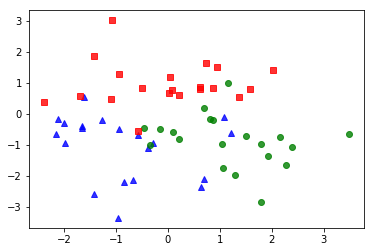

In [4]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(4)

means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T


def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 6, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 6, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 6, alpha = .8)

#     plt.axis('equal')
    plt.plot()
#     plt.show()
    
kmeans_display(X, original_label)
plt.show()
y = original_label.T
X = X.T

iter 0, loss: 1.098675
iter 1000, loss: 0.345588
iter 2000, loss: 0.324392
iter 3000, loss: 0.442391
iter 4000, loss: 0.306727
iter 5000, loss: 0.316580
iter 6000, loss: 0.298171
iter 7000, loss: 0.298613
iter 8000, loss: 0.298930
iter 9000, loss: 0.291051
training accuracy: 91.67 %
(1, 89600)


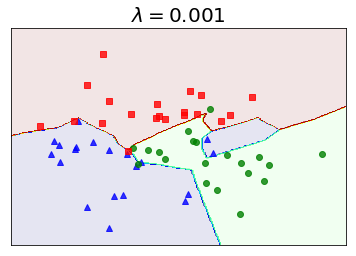

In [6]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# cost or loss function  
lam = 0.001 # regularization parameter 
def cost(Y, Yhat, W1, W2, lam):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1] + \
        lam*(np.linalg.norm(W1)**2 + np.linalg.norm(W2)**2)

d0 = 2
d1 = h = 100 # size of hidden layer 
d2 = C = 3

def mynet(lam):
    # initialize parameters randomely 
    W1 = 0.01*np.random.randn(d0, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))

    # X = X.T # each column of X is a data point 
    Y = convert_labels(y, C)
    N = X.shape[1]
    eta = 1 # learning rate 
    for i in range(10000):
        ## Feedforward 
        Z1 = np.dot(W1.T, X) + b1 
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        # import pdb; pdb.set_trace()  # breakpoint 035ab9b5 //
        Yhat = softmax(Z2)

        # compute the loss: average cross-entropy loss
        

        # print loss after each 1000 iterations
        if i %1000 == 0: 
            loss = cost(Y, Yhat, W1, W2, lam)
            print("iter %d, loss: %f" %(i, loss))

        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T) + lam*W2
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU 
        dW1 = np.dot(X, E1.T) + lam*W1
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # Gradient Descent update 
        # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
        W1 += -eta*dW1 
        b1 += -eta*db1 
        W2 += -eta*dW2
        b2 += -eta*db2 
#     return (W1, W2, b1, b2)




    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    predicted_class = np.argmax(Z2, axis=0)
    acc = (100*np.mean(predicted_class == y))
    print('training accuracy: %.2f %%' % acc)


    xm = np.arange(-3, 4, 0.025)
    xlen = len(xm)
    ym = np.arange(-4, 4, 0.025)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)

    print(np.ones((1, xx.size)).shape)
    xx1 = xx.ravel().reshape(1, xx.size)
    yy1 = yy.ravel().reshape(1, yy.size)

    X0 = np.vstack((xx1, yy1))

    Z1 = np.dot(W1.T, X0) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    # predicted class 
    Z = np.argmax(Z2, axis=0)

    Z = Z.reshape(xx.shape)
    CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

    kmeans_display(X.T, original_label.T)

    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    
    plt.title('$\lambda =$' + str(lam), fontsize = 20)
    fn = 'nnet_reg'+ str(lam) + '.png'
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()





iter 0, loss: 1.098508
iter 1000, loss: 0.331834
iter 2000, loss: 0.194378
iter 3000, loss: 0.155787
iter 4000, loss: 0.131419
iter 5000, loss: 0.118205
iter 6000, loss: 0.125320
iter 7000, loss: 0.089210
iter 8000, loss: 0.131770
iter 9000, loss: 0.087659
training accuracy: 96.67 %
(1, 89600)


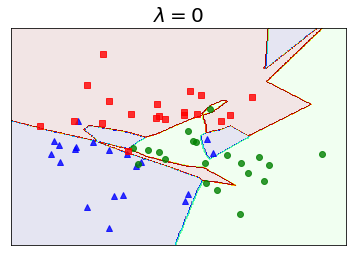

In [7]:
mynet(0)       # khong dung regularization

iter 0, loss: 1.098879
iter 1000, loss: 0.327449
iter 2000, loss: 0.394344
iter 3000, loss: 0.342896
iter 4000, loss: 0.349211
iter 5000, loss: 0.328838
iter 6000, loss: 0.305363
iter 7000, loss: 0.297769
iter 8000, loss: 0.312150
iter 9000, loss: 0.296351
training accuracy: 95.00 %
(1, 89600)


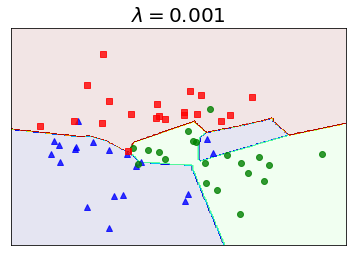

In [8]:
mynet(0.001)       #dung ragularization voi lamda = 0.001

iter 0, loss: 1.103305
iter 1000, loss: 0.972561
iter 2000, loss: 0.979140
iter 3000, loss: 0.972543
iter 4000, loss: 0.981651
iter 5000, loss: 0.978854
iter 6000, loss: 0.975520
iter 7000, loss: 0.981257
iter 8000, loss: 0.971032
iter 9000, loss: 0.976218
training accuracy: 81.67 %
(1, 89600)


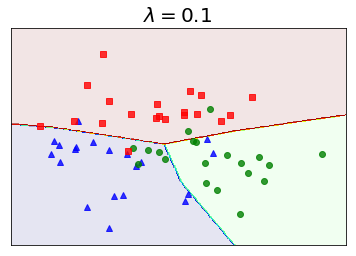

In [12]:
mynet(0.1)       #dung ragularization voi lamda = 0.1